Final Project for F1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
drivers = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/drivers.csv")
results = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/results.csv")
constructor_standings = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/constructor_standings.csv")
constructors = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/constructors.csv")
constructor_results = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/constructor_results.csv")
driver_standings = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/driver_standings.csv")
races = pd.read_csv("C:/Users/L/Documents/GitHub/qtm151/final-project/data-raw/races.csv")


Merging procedures

In [ ]:
# Filter Hamilton's records from the `drivers` dataset

hamilton_driver_record = drivers[(drivers['forename'] == 'Lewis') & (drivers['surname'] == 'Hamilton')]
hamilton_driver_id = hamilton_driver_record['driverId'].iloc[0]  # Extract Hamilton's driverId

# Display Hamilton's record and driverId for reference
hamilton_driver_record, hamilton_driver_id



(   driverId driverRef number code forename   surname         dob nationality  \
 0         1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
 
                                            url  
 0  http://en.wikipedia.org/wiki/Lewis_Hamilton  ,
 1)

In [ ]:
merge datasets 

In [21]:
# Merge datasets to focus on Hamilton's performance and constructor relationships

# Filter Hamilton's records from relevant datasets
hamilton_results = results[results['driverId'] == 1]
hamilton_driver_standings = driver_standings[driver_standings['driverId'] == 1]

# Merge results with constructor data to include constructor details
hamilton_results_with_constructors = hamilton_results.merge(
    constructors, on='constructorId', how='left'
)

# Merge results with races data to add temporal context
hamilton_results_with_races = hamilton_results_with_constructors.merge(
    races[['raceId', 'year', 'round', 'name']], on='raceId', how='left'
)

# Merge with constructor standings for constructor performance during Hamilton's races
hamilton_data_complete = hamilton_results_with_races.merge(
    constructor_standings[['raceId', 'constructorId', 'points', 'position', 'wins']],
    on=['raceId', 'constructorId'], how='left', suffixes=('', '_constructor')
)

# Display a preview of the final merged dataset for Hamilton
hamilton_data_complete.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,constructorRef,name_x,nationality,url,year,round,name_y,points_constructor,position_constructor,wins
0,1,18,1,1,22,1,1,1,1,10.0,...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,Australian Grand Prix,14.0,1.0,1.0
1,27,19,1,1,22,9,5,5,5,4.0,...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,2,Malaysian Grand Prix,24.0,1.0,1.0
2,57,20,1,1,22,3,13,13,13,0.0,...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,3,Bahrain Grand Prix,28.0,3.0,1.0
3,69,21,1,1,22,5,3,3,3,6.0,...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,4,Spanish Grand Prix,34.0,3.0,1.0
4,90,22,1,1,22,3,2,2,2,8.0,...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,5,Turkish Grand Prix,42.0,3.0,1.0


analysis

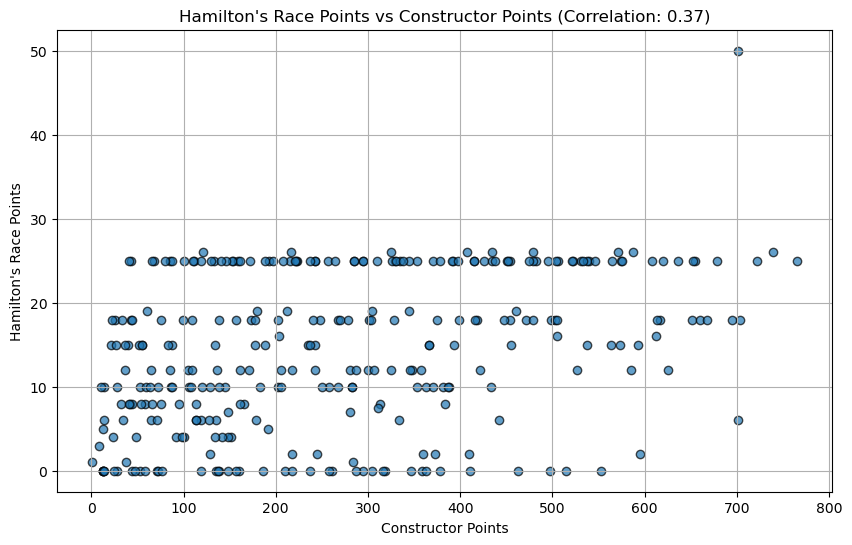

In [47]:
correlation_points = hamilton_data_complete['points_constructor'].corr(
    hamilton_data_complete['points']
)
# Scatter plot of Hamilton's race points vs constructor points
plt.figure(figsize=(10, 6))
plt.scatter(
    hamilton_data_complete['points_constructor'],
    hamilton_data_complete['points'],
    alpha=0.7, edgecolors='black'
)
plt.title(f"Hamilton's Race Points vs Constructor Points (Correlation: {correlation_points:.2f})")
plt.xlabel("Constructor Points")
plt.ylabel("Hamilton's Race Points")
plt.grid(True)
plt.show()



In [ ]:
# group by 'year' and aggregate points
hamilton_constructor_yearly = hamilton_data_complete.groupby('year').agg({
    'points': 'sum',
    'points_constructor': 'sum'
}).reset_index()

# Preview the grouped dataset
hamilton_constructor_yearly.head()



,year,points,points_constructor
0,2007,109.0,2072.0
1,2008,98.0,1491.0
2,2009,49.0,514.0
3,2010,240.0,4705.0
4,2011,227.0,4896.0


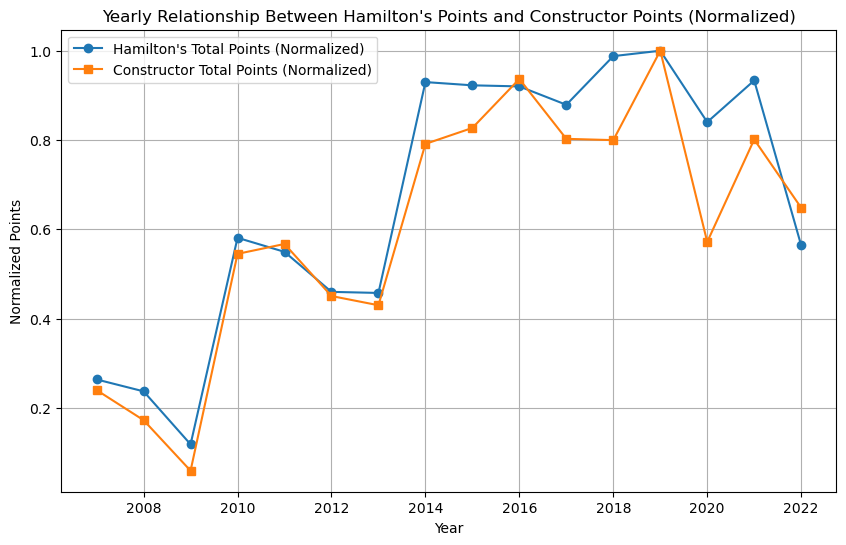

In [50]:
# Normalize the points to bring both Hamilton's and constructor's points onto a comparable scale
hamilton_constructor_yearly['points_normalized'] = (
    hamilton_constructor_yearly['points'] / hamilton_constructor_yearly['points'].max()
)
hamilton_constructor_yearly['points_constructor_normalized'] = (
    hamilton_constructor_yearly['points_constructor'] / hamilton_constructor_yearly['points_constructor'].max()
)

# Line plot with normalized scales
plt.figure(figsize=(10, 6))
plt.plot(
    hamilton_constructor_yearly['year'],
    hamilton_constructor_yearly['points_normalized'],
    marker='o',
    label="Hamilton's Total Points (Normalized)"
)
plt.plot(
    hamilton_constructor_yearly['year'],
    hamilton_constructor_yearly['points_constructor_normalized'],
    marker='s',
    label="Constructor Total Points (Normalized)"
)
plt.title("Yearly Relationship Between Hamilton's Points and Constructor Points (Normalized)")
plt.xlabel("Year")
plt.ylabel("Normalized Points")
plt.legend()
plt.grid(True)
plt.show()


boxplot

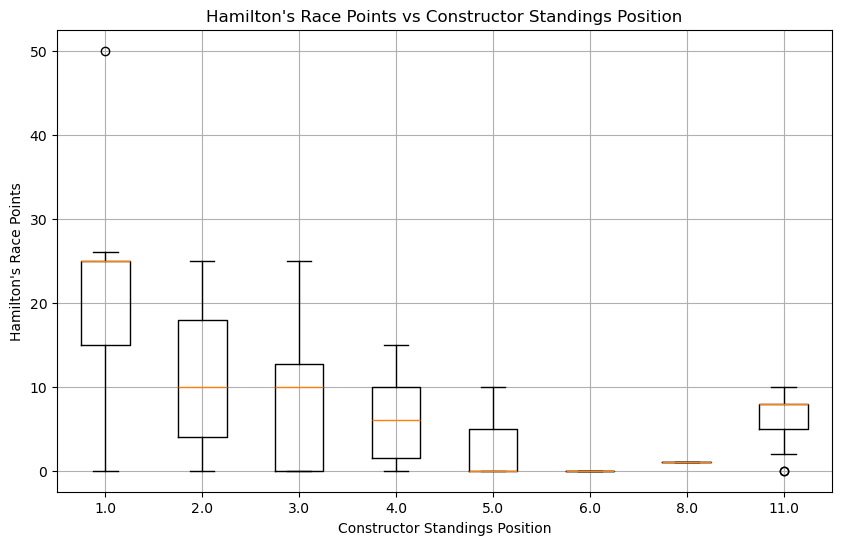

In [24]:
# Box plot of Hamilton's race points vs constructor standings position
plt.figure(figsize=(10, 6))
positions = hamilton_data_complete['position_constructor'].dropna().unique()
positions.sort()
box_data = [hamilton_data_complete[hamilton_data_complete['position_constructor'] == pos]['points']
            for pos in positions]

plt.boxplot(box_data, labels=positions)
plt.title("Hamilton's Race Points vs Constructor Standings Position")
plt.xlabel("Constructor Standings Position")
plt.ylabel("Hamilton's Race Points")
plt.grid(True)
plt.show()